<a href="https://colab.research.google.com/github/PARODBE/MASTER-IA/blob/main/ML_in_Guasones_vs_Penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

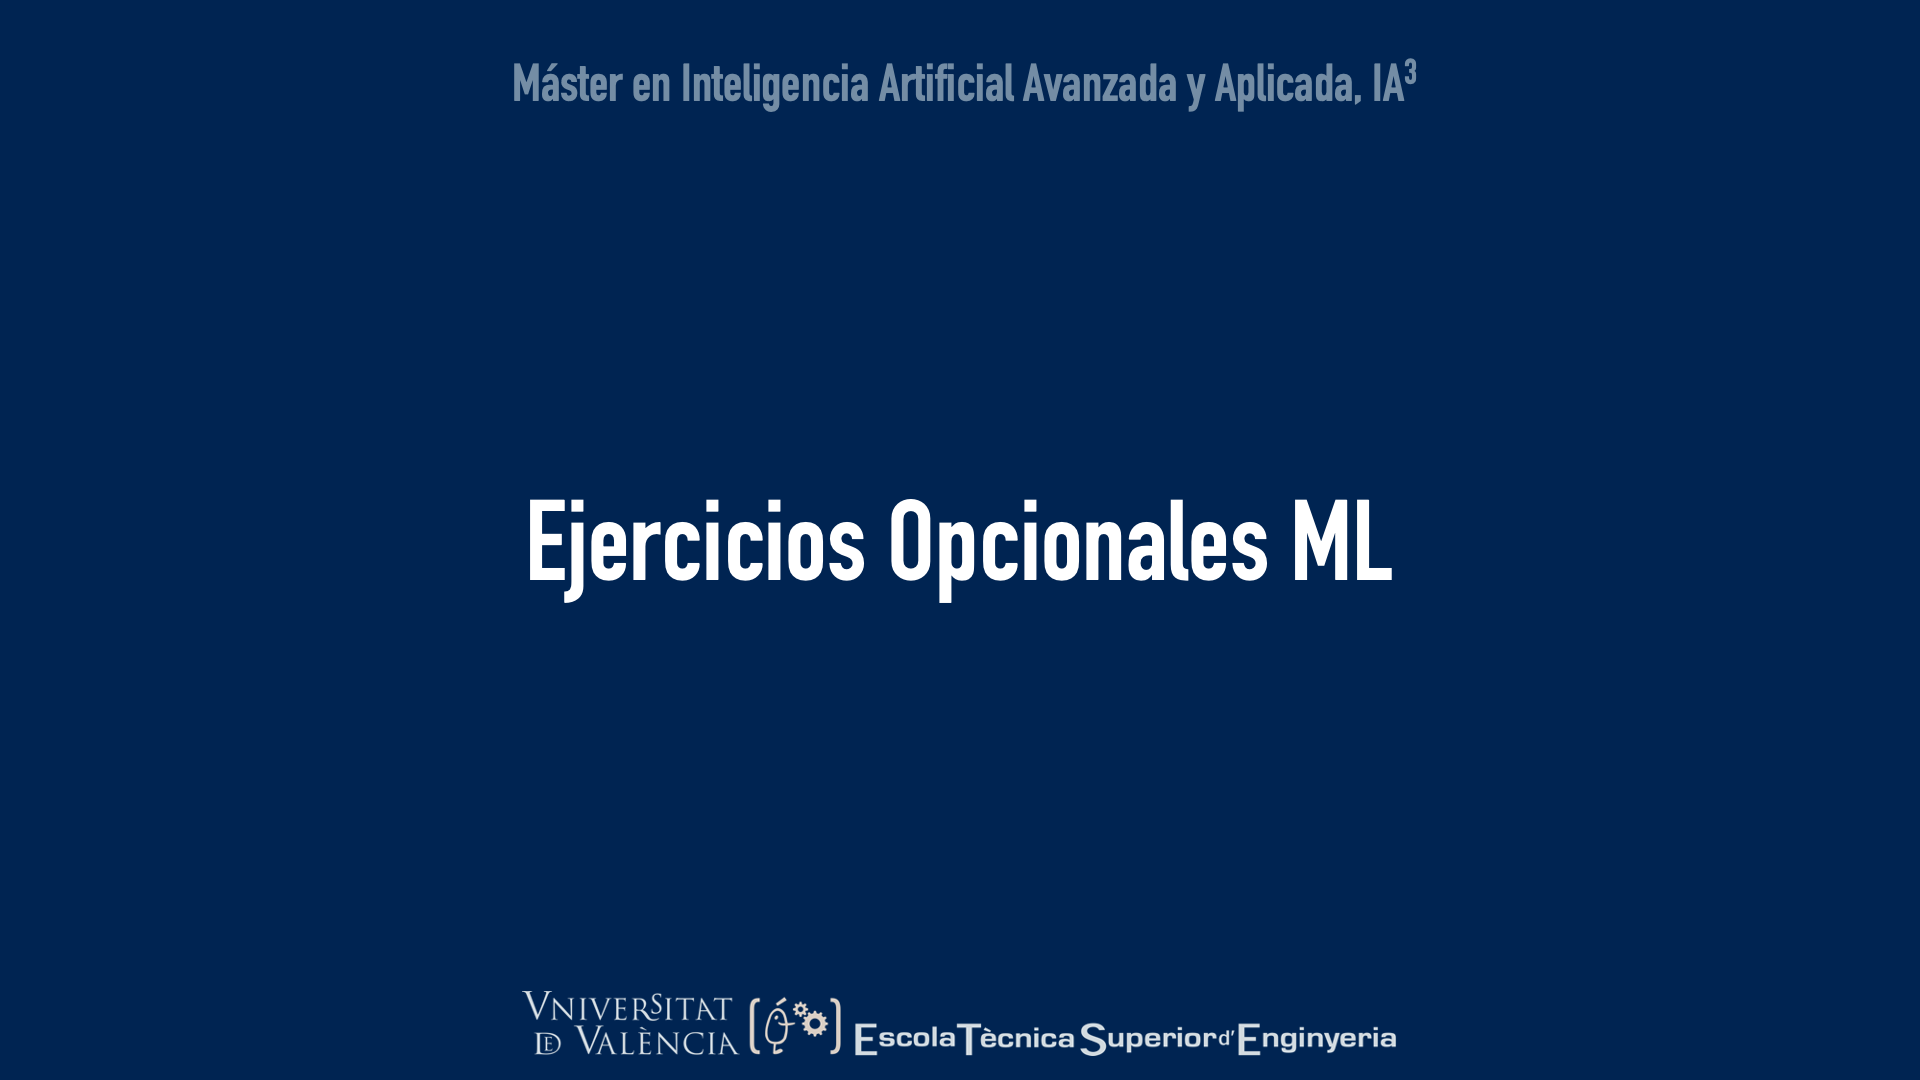

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

Los integrantes del Guasones Team son:

- Rafel Peris Gómez
- Borja Ramón Gómez
- Pablo Rodríguez Belenguer

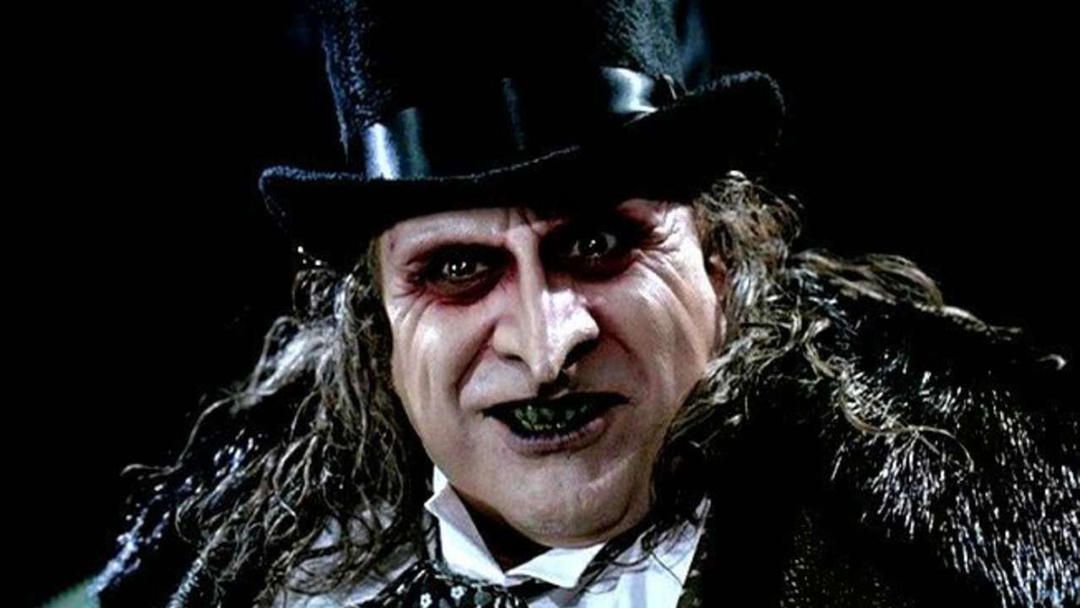

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

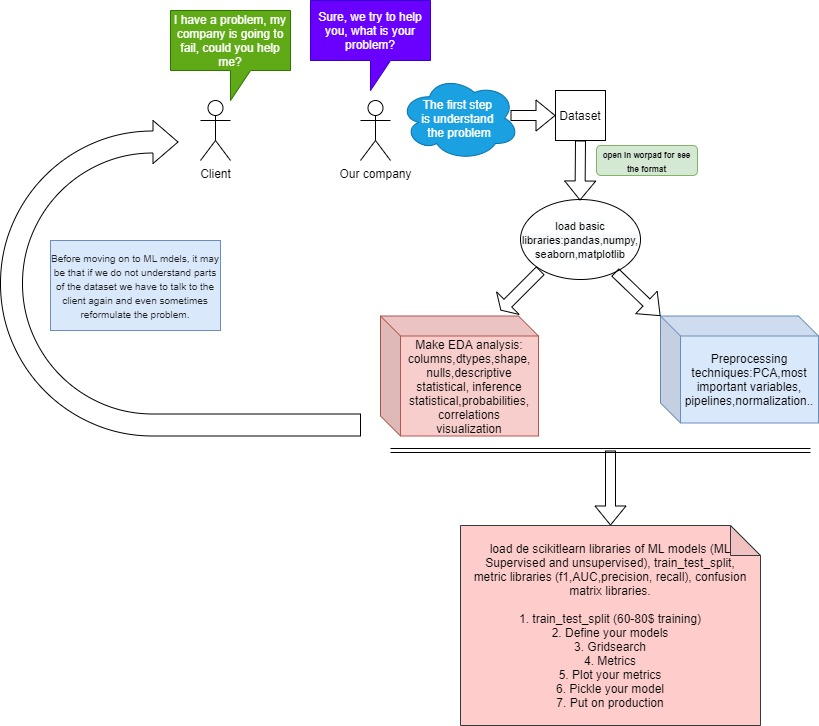

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

dataset=sns.load_dataset('penguins')
print(dataset.columns)
print(dataset.dtypes)
print(dataset.describe())

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [ ]:
def sum_null(df):
  aux=dataset.isnull().sum()
  print(aux[aux>0])

In [ ]:
dataset=dataset.dropna()

In [ ]:
sum_null(dataset)#función que he hecho para comprobar si hay nans o no.

Series([], dtype: int64)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a109deef0>,
      dtype=object)

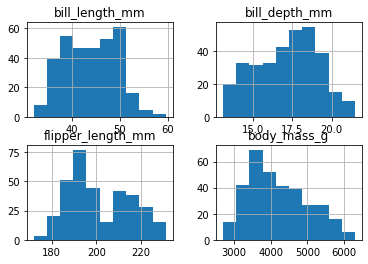

In [ ]:
dataset.hist()#se puede ver como no siguen una distribución normal, por tanto voy a hacer correlación de spearman

<Figure size 576x576 with 0 Axes>

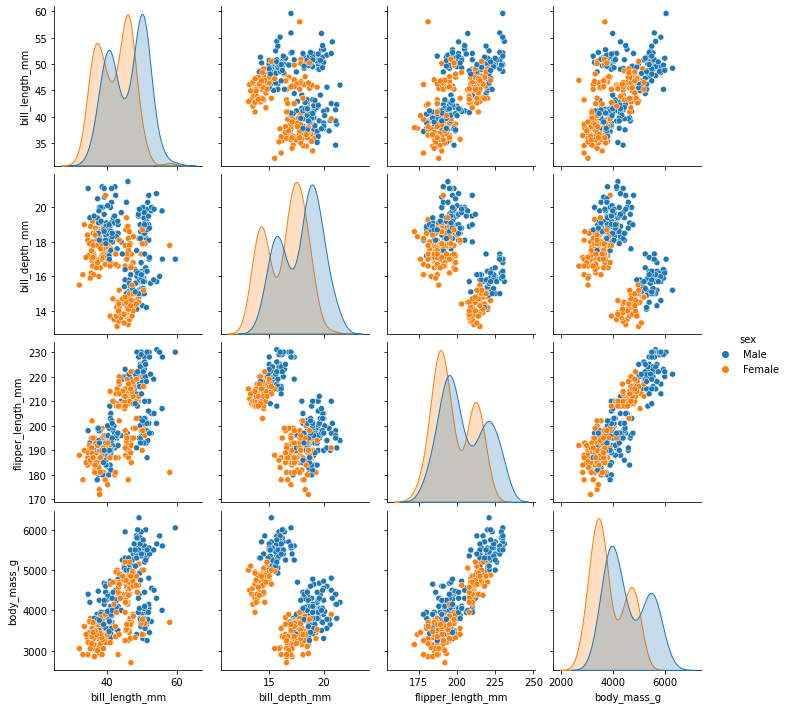

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.pairplot(dataset, hue='sex')
plt.show()#aquí podemos ver la relación lineal entre flipper y body mass, vamos a hacer un test de correlación de spearman para confirmar que están altamente correladas y luego vamos a hacer una gráfica px para verlo

In [ ]:
dataset.corr(method='spearman')# vemos que la correlación más alta la tienen entre body_mass_g y flipper_length_mm, también hay algo de relación entre flipper length y bill length

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.213859,0.669754,0.576480
bill_depth_mm,-0.213859,1.000000,-0.517317,-0.429283
flipper_length_mm,0.669754,-0.517317,1.000000,0.840390
body_mass_g,0.576480,-0.429283,0.840390,1.000000


In [ ]:
import plotly.express as px

fig=px.scatter(dataset,x='body_mass_g',y='flipper_length_mm',color='sex')#como podemos ver existe una gran relación lineal
fig.show()

In [ ]:
fig=px.scatter_3d(dataset,x='body_mass_g',y='flipper_length_mm',z='bill_depth_mm',size='bill_length_mm',color='sex')
fig.show()#como vemos está todo junto enmarañado, no hay una separación entre clases

In [ ]:
dataset_dum=pd.get_dummies(dataset,drop_first=True)

In [ ]:
dataset_dum=dataset_dum.rename({'sex_Male':'sex'},axis=1)

In [ ]:
X=dataset_dum.iloc[:,:-1]
y=dataset_dum.iloc[:,-1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

In [ ]:
print('X_train:',X_train.shape,'X_test:',X_test.shape,'y_train:',y_train.shape,'y_test:',y_test.shape)#todo correcto

X_train: (216, 8) X_test: (117, 8) y_train: (216, 1) y_test: (117, 1)


In [ ]:
from sklearn.model_selection import GridSearchCV,KFold

param_grid_LR={'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
param_grid_svm={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':[1e-4,1e-3,1e-2]}
#tuned_parameters=[{'label_grid':'grid_LR','grid':param_grid_LR},{'label_grid':'grid_svm','grid':param_grid_svm}]
#LR=LogisticRegression()
#NB=GaussianNB()
#svm=SVC()
#models=[{'label':'LR','model':LR},{'label':'NB','model':NB},{'label':'svm','model':svm}]
cv_splitter = KFold(n_splits=10, shuffle=False, random_state=None)

In [ ]:
gridsearch_LR=GridSearchCV(LogisticRegression(),param_grid=param_grid_LR,scoring='f1_micro',cv=cv_splitter)
gridsearch_LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/pytho

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [ ]:
gridsearch_LR.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
gridsearch_LR.cv_results_

{'mean_fit_time': array([0.00124931, 0.001086  , 0.00487149, 0.00116584, 0.00687833,
        0.08010838, 0.01322064, 0.00254669, 0.00496769, 0.00595605,
        0.0012738 , 0.00119665, 0.01196594, 0.00086143, 0.00692713,
        0.09538212, 0.01567378, 0.00258553, 0.00511646, 0.00601614,
        0.00108047, 0.00113945, 0.02463508, 0.00108025, 0.00688145,
        0.09803743, 0.02045174, 0.00269599, 0.00552976, 0.00582399,
        0.00108542, 0.00110934, 0.0184423 , 0.00108564, 0.00695877,
        0.11973164, 0.02458417, 0.00293479, 0.00517149, 0.00565622,
        0.00109508, 0.00111647, 0.01872175, 0.00109124, 0.00661523,
        0.13467159, 0.02273602, 0.00307415, 0.00633967, 0.0055001 ]),
 'mean_score_time': array([0.        , 0.        , 0.00207887, 0.        , 0.00232236,
        0.00188375, 0.00217571, 0.00153854, 0.00204318, 0.00224323,
        0.        , 0.        , 0.0020896 , 0.        , 0.00206442,
        0.0019666 , 0.00201845, 0.00155089, 0.00199568, 0.00209377,
        0.

In [ ]:
gridsearch_LR.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refi

In [ ]:
model_LR=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
model_LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWa

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=model_LR.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_score,accuracy_score,recall_score

print('roc_AUC_SCORE:',roc_auc_score(y_test,model_LR.predict_proba(X_test)[:,1]))
print('Accuracy_LR:',accuracy_score(y_test,y_pred))
print('Precision_LR:',precision_score(y_test,y_pred))
print('Recall_LR:',recall_score(y_test,y_pred))

roc_AUC_SCORE: 0.9839572192513368
Accuracy_LR: 0.9401709401709402
Precision_LR: 0.9682539682539683
Recall_LR: 0.9242424242424242


In [ ]:
metrics_LR=pd.DataFrame({'AUC':[roc_auc_score(y_test,model_LR.predict_proba(X_test)[:,1])],'Accuracy':[accuracy_score(y_test,y_pred)],'Precision':[precision_score(y_test,y_pred)],'Recall':[recall_score(y_test,y_pred)],'Params':[gridsearch_LR.best_params_]})
metrics_LR=metrics_LR.rename({0:'Logistic Regression'})

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,model_LR.predict_proba(X_test)[:,1])
df_roc=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thres':threshold})

In [ ]:
df_roc

,fpr,tpr,thres
0,0.000000,0.000000,1.999998
1,0.000000,0.015152,0.999998
2,0.000000,0.803030,0.743970
3,0.019608,0.803030,0.738311
4,0.019608,0.893939,0.566387
5,0.039216,0.893939,0.559426
6,0.039216,0.924242,0.510809
7,0.058824,0.924242,0.466211
8,0.058824,0.939394,0.465671
9,0.078431,0.939394,0.449274


In [ ]:
fig_LR=px.line(df_roc,x='fpr',y='tpr',hover_data=['thres'])
fig_LR.show()

**Ya hemos analizado todo del modelo Regresión Logística y es bastante bueno, vamos con Naïve Bayes!!!**

In [ ]:
model_NB=GaussianNB()
model_NB.fit(X_train,y_train)
y_pred_NB=model_NB.predict(X_test)
metrics_NB=pd.DataFrame({'AUC':[roc_auc_score(y_test,model_NB.predict_proba(X_test)[:,1])],'Accuracy':[accuracy_score(y_test,y_pred_NB)],'Precision':[precision_score(y_test,y_pred_NB)],'Recall':[recall_score(y_test,y_pred_NB)],'Params':['-']})
metrics_NB=metrics_NB.rename({0:'Naïve Bayes'})

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
fpr,tpr,threshold=roc_curve(y_test,model_NB.predict_proba(X_test)[:,1])
df_roc_nb=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thres':threshold})
fig_nb=px.line(df_roc_nb,x='fpr',y='tpr',hover_data=['thres'])
fig_nb.show()

***Podemos ver que Naive Bayes para este problema no es un buen modelo,vamos con support vector machines!***

In [ ]:
gridsearch_SVM=GridSearchCV(SVC(),param_grid=param_grid_svm,scoring='f1_micro',cv=cv_splitter)
gridsearch_SVM.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=0)

In [ ]:
pd.DataFrame(gridsearch_SVM.best_params_,index=[0])


,C,gamma,kernel
0,10,0.0001,linear


In [ ]:
gridsearch_SVM.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
gridsearch_SVM.best_score_

0.8885281385281386

In [ ]:
model_SVM=SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model_SVM.fit(X_train,y_train)
y_pred_SVM=model_SVM.predict(X_test)
metrics_SVM=pd.DataFrame({'AUC':[roc_auc_score(y_test,model_SVM.predict_proba(X_test)[:,1])],'Accuracy':[accuracy_score(y_test,y_pred_SVM)],'Precision':[precision_score(y_test,y_pred_SVM)],'Recall':[recall_score(y_test,y_pred_SVM)],'Params':[gridsearch_SVM.best_params_]})
metrics_SVM=metrics_SVM.rename({0:'SVM'})

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
fpr,tpr,threshold=roc_curve(y_test,model_SVM.predict_proba(X_test)[:,1])
df_roc_SVM=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thres':threshold})

In [ ]:
import plotly.graph_objects as go

colors = px.colors.qualitative.Plotly
fig = go.Figure()
fig.add_traces(go.Scatter(x=df_roc['fpr'], y = df_roc['tpr'], mode = 'lines', line=dict(color=colors[0]),name='Logistic_Regression'))
fig.add_traces(go.Scatter(x=df_roc_nb['fpr'], y = df_roc_nb['tpr'], mode = 'lines', line=dict(color=colors[1]),name='Gaussian_NB'))
fig.add_traces(go.Scatter(x=df_roc_SVM['fpr'], y = df_roc_SVM['tpr'], mode = 'lines', line=dict(color=colors[2]),name='SVM'))
fig.update_layout(title="ROC CURVES for models selected with their parameters")
fig.show()

In [ ]:
df_metrics=pd.concat([metrics_LR,metrics_NB,metrics_SVM])
df_metrics

,AUC,Accuracy,Precision,Recall,Params
Logistic Regression,0.983957,0.940171,0.968254,0.924242,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}"
Naïve Bayes,0.726381,0.623932,0.696429,0.590909,-
SVM,0.972371,0.897436,0.921875,0.893939,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}"


Tanto computacionalmente, como en métricas el mejor modelo resulta la regresión logística, con los resultados que se pueden ver en test, y las Curvas Roc que antes se han presentado, es el mejor modelo claramente. Lo de computacionalmente lo aclaro, ya que SVM es un modelo muy parejo pero requiere más recursos computacionalmente (además insisto en que las métricas son peores).

Vamos por tanto a presentar la matriz de confusión del modelo ganador, Logistic Regression

Text(0.5, 1.0, 'Confusion matrix for LR')

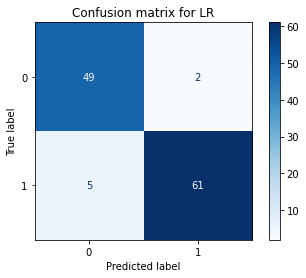

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test,y_pred)
plot_confusion_matrix(model_LR,X_test, y_test, cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion matrix for LR")

Asimismo vamos a presentar una tabla para este mismo modelo donde se presentan los datos de la predicción y los reales, en la matriz de confusión se ve que hay 5 FN y 2 FP por tanto podríamos ver en esa tabla si queremos donde están los fallos en la predicción.

In [ ]:
df_predic_LR=pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred)], axis=1)
df_predic_LR=df_predic_LR.rename({0:'Sexo_predicho'},axis=1)
df_predic_LR.sample(15)

,sex,Sexo_predicho
97,0,0
6,0,0
78,0,0
87,0,0
24,0,0
1,1,1
74,0,0
7,1,1
83,0,0
96,1,1
